# Exploratory Data Analysis

## Problem Statement:

PowerCo, a major gas and electricity utility, serves a wide range of customers, including corporate, Small & Medium Enterprises (SMEs), and residential users. However, the deregulation of the European energy market has introduced a significant challenge in the form of customer churn, particularly prevalent in the SME segment. To address this pressing issue, PowerCo has partnered with BCG to diagnose the root causes of churn within the SME customer base.

One prominent hypothesis is that pricing dynamics significantly influence customer churn. Understanding the likelihood of customer churn at current price levels is critical, and the development of an effective predictive model holds the key to achieving this understanding.

To retain customers at risk of churning, the SME division is considering a strategic approach involving a substantial 20% discount. This discount is expected to dissuade a significant number of customers from churning, especially those for whom pricing is a major concern.

This notebook contains the data analysis of the provided data and the extracted insights from it.

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [10]:
client_df['date_activ']=pd.to_datetime(client_df['date_activ'])
client_df['date_end']=pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod']=pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal']=pd.to_datetime(client_df['date_renewal'])

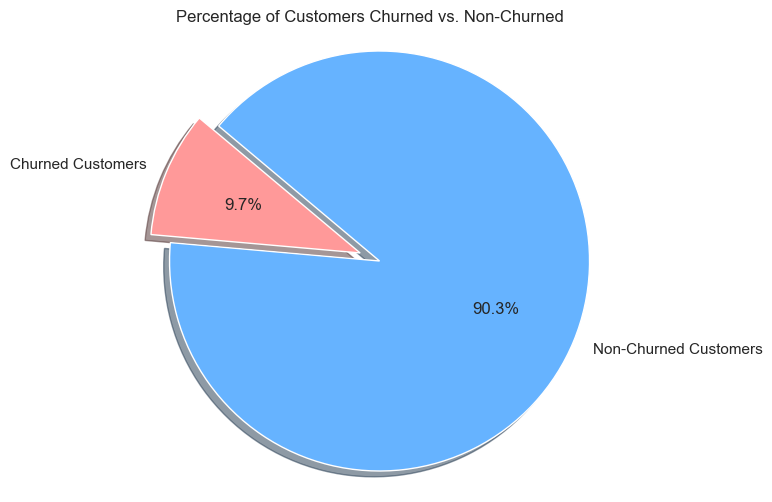

In [11]:
num_churned_count = len(client_df[client_df['churn'] == 1])
num_non_churned_count = len(client_df[client_df['churn'] == 0])

labels = ['Churned Customers', 'Non-Churned Customers']
sizes = [num_churned_count, num_non_churned_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Customers Churned vs. Non-Churned')

plt.axis('equal')

plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
channel_encoder = LabelEncoder()
client_df['channel_sales'] = channel_encoder.fit_transform(client_df['channel_sales'])
origin_encoder = LabelEncoder()
client_df['origin_up'] = origin_encoder.fit_transform(client_df['origin_up'])

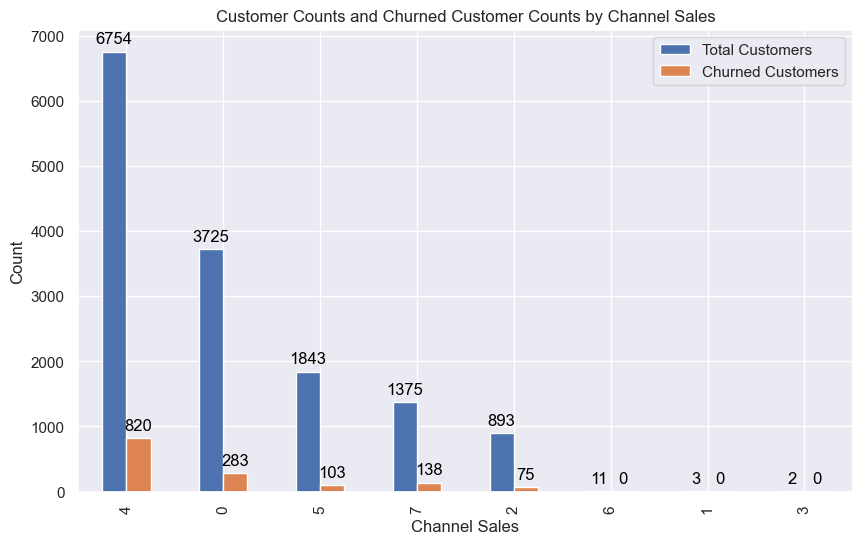

In [20]:
channel_customer_counts = client_df.groupby('channel_sales')['id'].count()

churned_customer_counts = client_df[client_df['churn'] == 1].groupby('channel_sales')['id'].count()

result_df = pd.DataFrame({'Total Customers': channel_customer_counts, 'Churned Customers': churned_customer_counts})

result_df = result_df.sort_values(by='Total Customers', ascending=False)

ax = result_df.plot(kind='bar', figsize=(10, 6), legend=True)

plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.title('Customer Counts and Churned Customer Counts by Channel Sales')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 9),
                textcoords='offset points')

plt.show()

There is no direct relationship between churning of customer and sales channel. Although the graph show which code channel has how much customers and how much of them have churned in past 3 months.

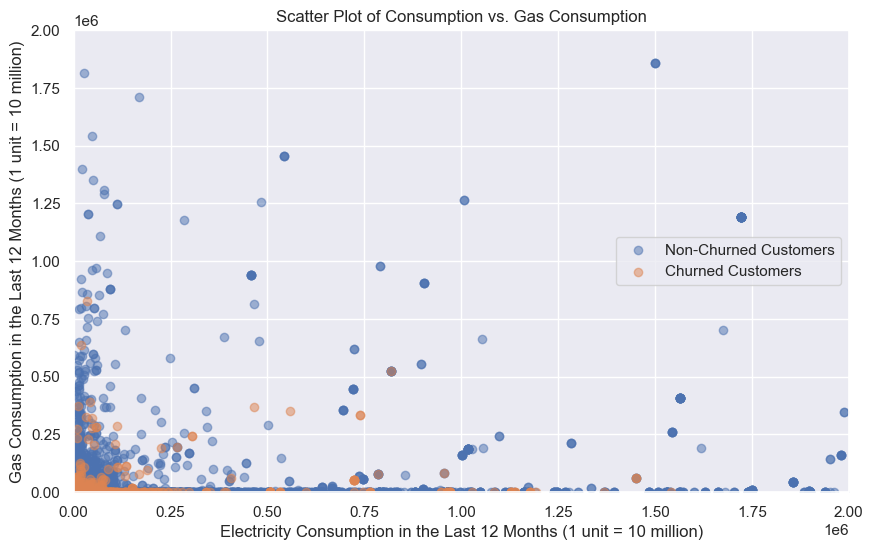

In [14]:
churned_customers = client_df[client_df['churn'] == 1]
non_churned_customers = client_df[client_df['churn'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(non_churned_customers['cons_12m'], non_churned_customers['cons_gas_12m'], label='Non-Churned Customers', alpha=0.5)
plt.scatter(churned_customers['cons_12m'], churned_customers['cons_gas_12m'], label='Churned Customers', alpha=0.5)

plt.xlabel('Electricity Consumption in the Last 12 Months (1 unit = 10 million)')
plt.ylabel('Gas Consumption in the Last 12 Months (1 unit = 10 million)')
plt.title('Scatter Plot of Consumption vs. Gas Consumption')
plt.legend()

plt.xlim(0.00, 2e6)
plt.ylim(0.00, 2e6)

plt.show()

Based on the plotted data, it appears that customers who are significant consumers of gas in the last 12 months are less likely to churn compared to those who are significant consumers of electricity.

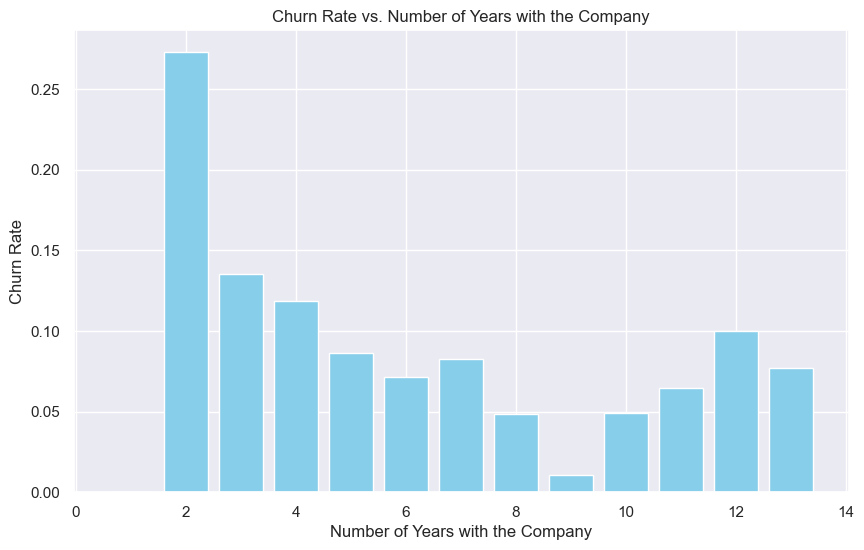

In [15]:
churn_rate_per_antig = client_df.groupby('num_years_antig')['churn'].mean()

plt.figure(figsize=(10, 6))
plt.bar(churn_rate_per_antig.index, churn_rate_per_antig.values, color='skyblue')

plt.xlabel('Number of Years with the Company')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Number of Years with the Company')

plt.show()

The graph clearly indicates that the churn rate is notably elevated within the first two years of being associated with the company. The churn rate gradually decreases up to around nine years, after which it exhibits a slight deviation from this declining trend.

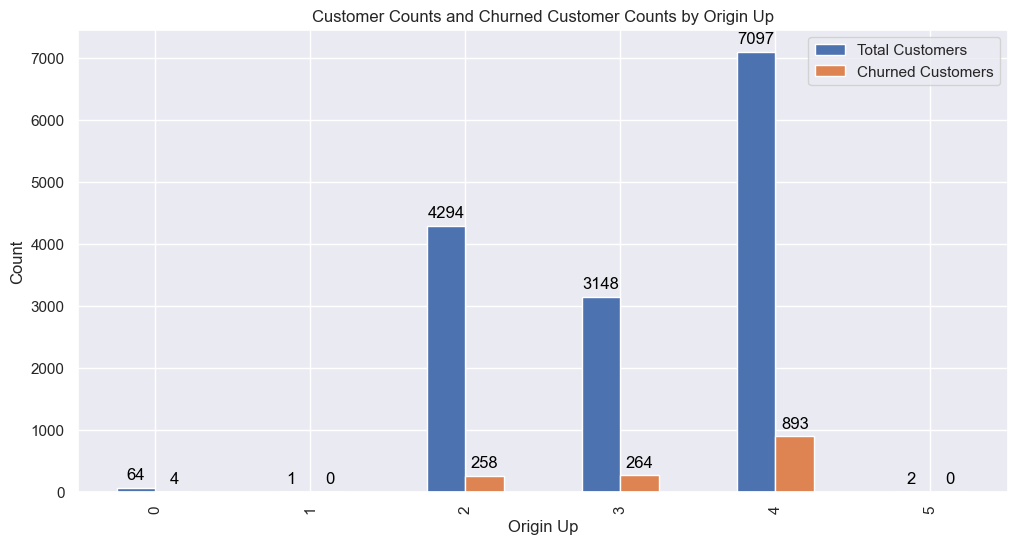

In [16]:
origin_up_counts = client_df.groupby('origin_up')['id'].count()
origin_up_churned_counts = client_df[client_df['churn'] == 1].groupby('origin_up')['id'].count()

# Combine the counts into a single DataFrame
result_df = pd.DataFrame({'Total Customers': origin_up_counts, 'Churned Customers': origin_up_churned_counts})

# Plot the double bar graph
ax = result_df.plot(kind='bar', figsize=(12, 6))

# Adding labels and title
plt.xlabel('Origin Up')
plt.ylabel('Count')
plt.title('Customer Counts and Churned Customer Counts by Origin Up')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

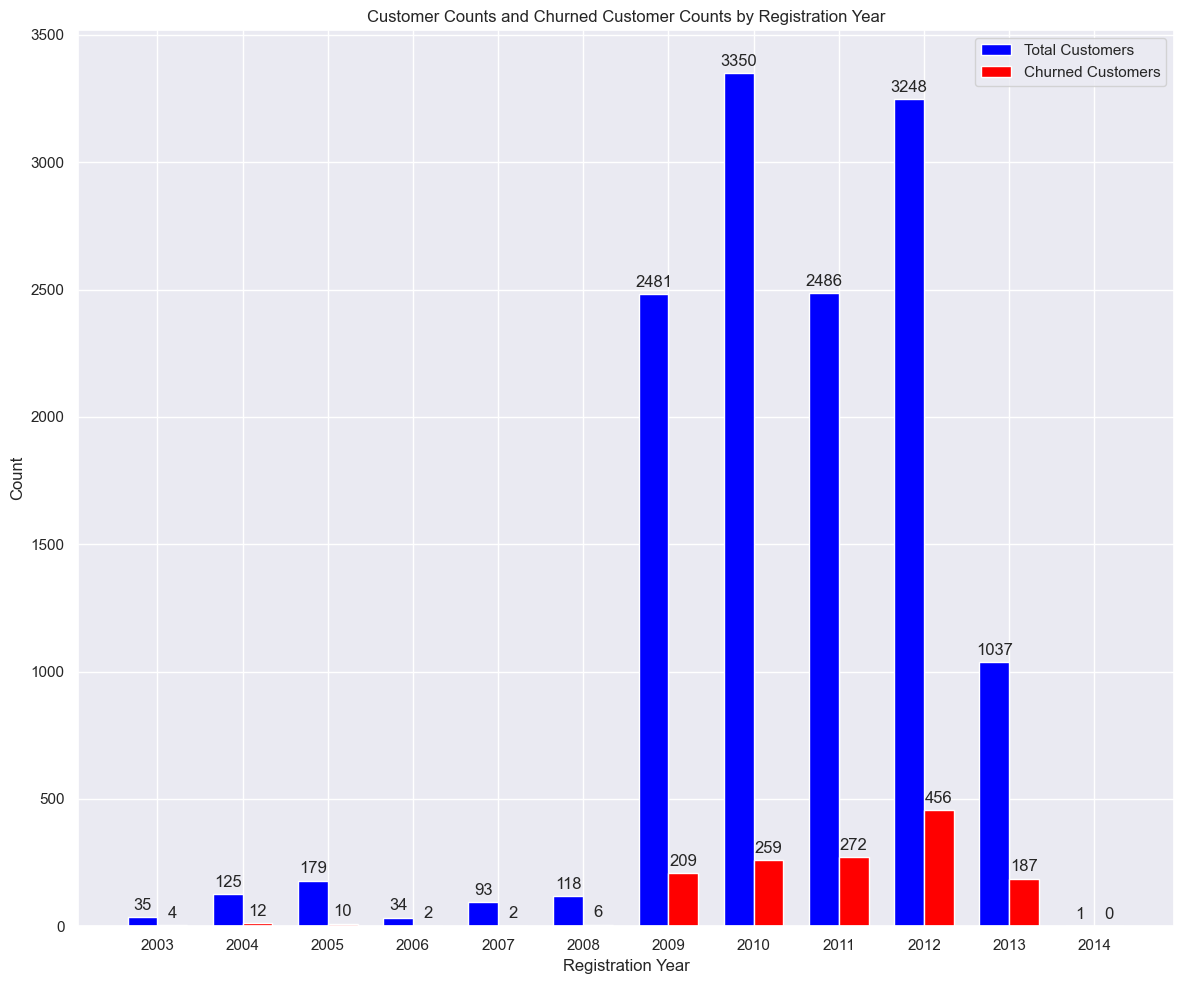

In [21]:
client_df['registration_year'] = pd.to_datetime(client_df['date_activ']).dt.year
yearly_counts = client_df.groupby(['registration_year', 'churn'])['id'].count().unstack().fillna(0)

# Plot the double bar graph
x = range(len(yearly_counts.index))  # X-axis positions for the bars

fig, ax = plt.subplots(figsize=(12, 10))
bar_width = 0.35  # Width of each bar

# Plotting total customers
bar1 = ax.bar(x, yearly_counts[0], width=bar_width, label='Total Customers', color='blue')

# Plotting churned customers
bar2 = ax.bar([p + bar_width for p in x], yearly_counts[1], width=bar_width, label='Churned Customers', color='red')

# Adding labels and title
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.title('Customer Counts and Churned Customer Counts by Registration Year')
plt.xticks([p + bar_width/2 for p in x], yearly_counts.index)  # Setting x-axis ticks at midpoint of each group
plt.legend()

# Add the counts on top of the bars
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

A huge number of customers registered in year 2009 - 2013. 2013 is the year in which maximum number of curtomer churned and after that year registration declined by approximately 66%. 

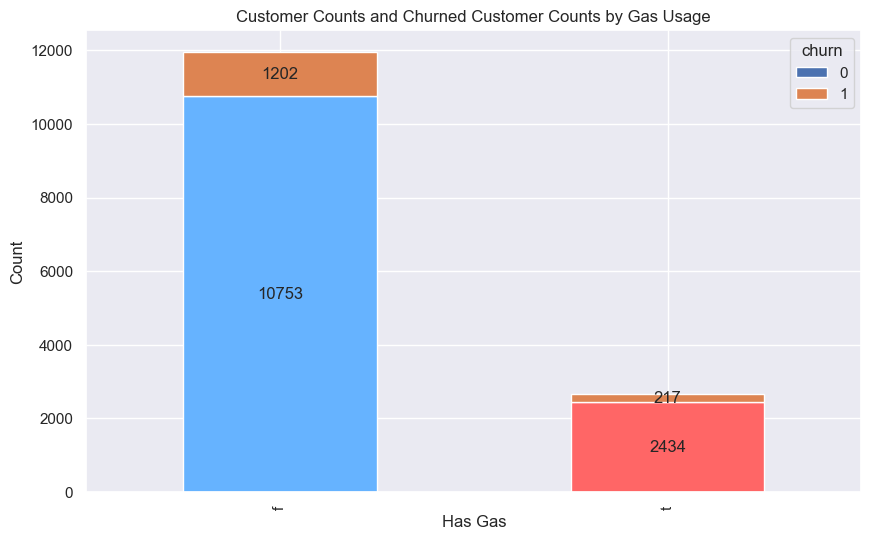

In [18]:
has_gas_counts = client_df.groupby(['has_gas', 'churn'])['id'].count().unstack().fillna(0)

# Plot the bar graph
ax = has_gas_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Has Gas')
plt.ylabel('Count')
plt.title('Customer Counts and Churned Customer Counts by Gas Usage')

# Add the counts on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)

# Set different colors for churned and non-churned customers
ax.patches[0].set_facecolor('#66b3ff')  # Non-churned
ax.patches[1].set_facecolor('#ff6666')  # Churned

# Display the plot
plt.show()

A large pack of cutomers does not have gas connection. Also churn is higher among the customers who doesnot have gas.

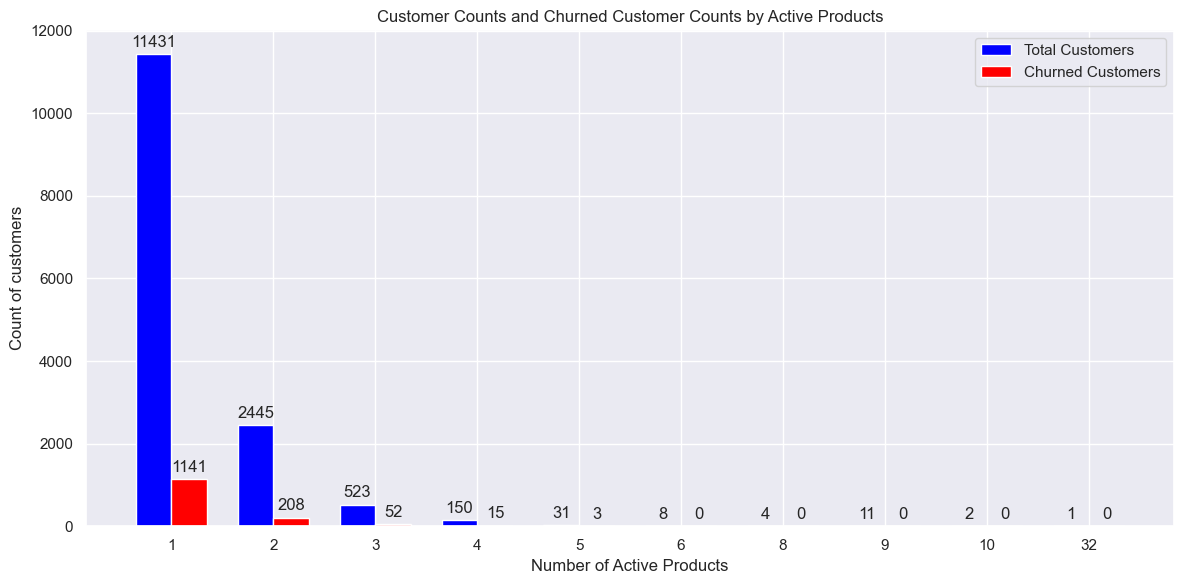

In [19]:
active_products_counts = client_df.groupby(['nb_prod_act', 'churn'])['id'].count().unstack().fillna(0)

# Calculate total customers for each active product count
active_products_counts['total'] = active_products_counts.sum(axis=1)

# Calculate the percentage of churned customers for each active product count
active_products_counts['churn_percentage'] = (active_products_counts[1] / active_products_counts['total']) * 100

# Plot the grouped bar chart
x = np.arange(len(active_products_counts))

width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, active_products_counts['total'], width, label='Total Customers', color='blue')
bar2 = ax.bar(x + width/2, active_products_counts[1], width, label='Churned Customers', color='red')

# Adding labels and title
ax.set_xlabel('Number of Active Products')
ax.set_ylabel('Count of customers')
ax.set_title('Customer Counts and Churned Customer Counts by Active Products')
ax.set_xticks(x)
ax.set_xticklabels(active_products_counts.index)
ax.legend()

# Add the counts on top of the bars
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()

# Display the plot
plt.show()

From the above graph we can deduct that maximum number of customers have 1 to 3 product active. Although there is not much data for customers having active products more than 5 but there is a trend that customers having active product more than 5 have not churned.

Now, creating function for plotting histogram of countinous numeric features.

In [22]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    palette = {0: 'blue', 1: 'red'}  # Customize the palette (0 for non-churn, 1 for churn)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn', palette=palette)
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

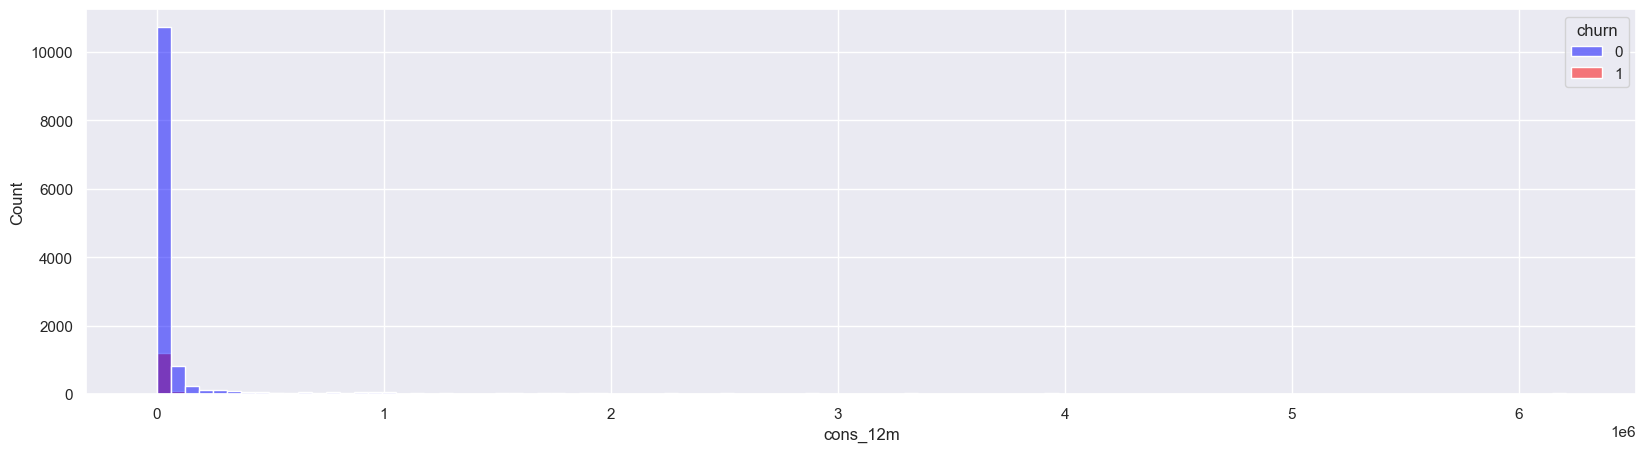

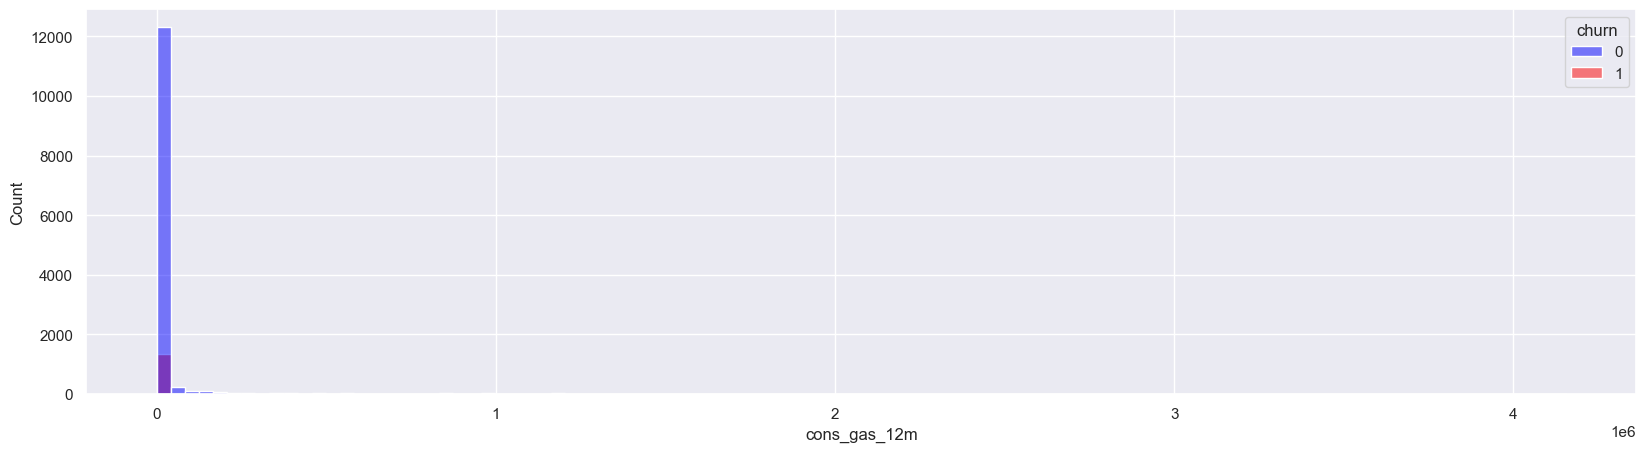

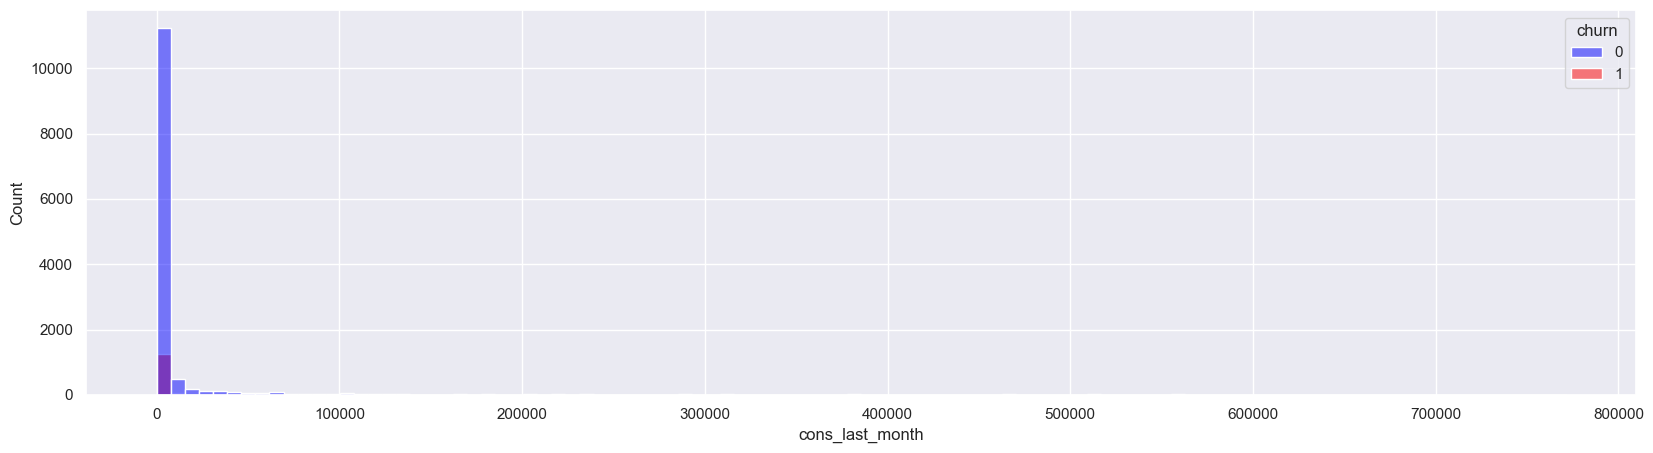

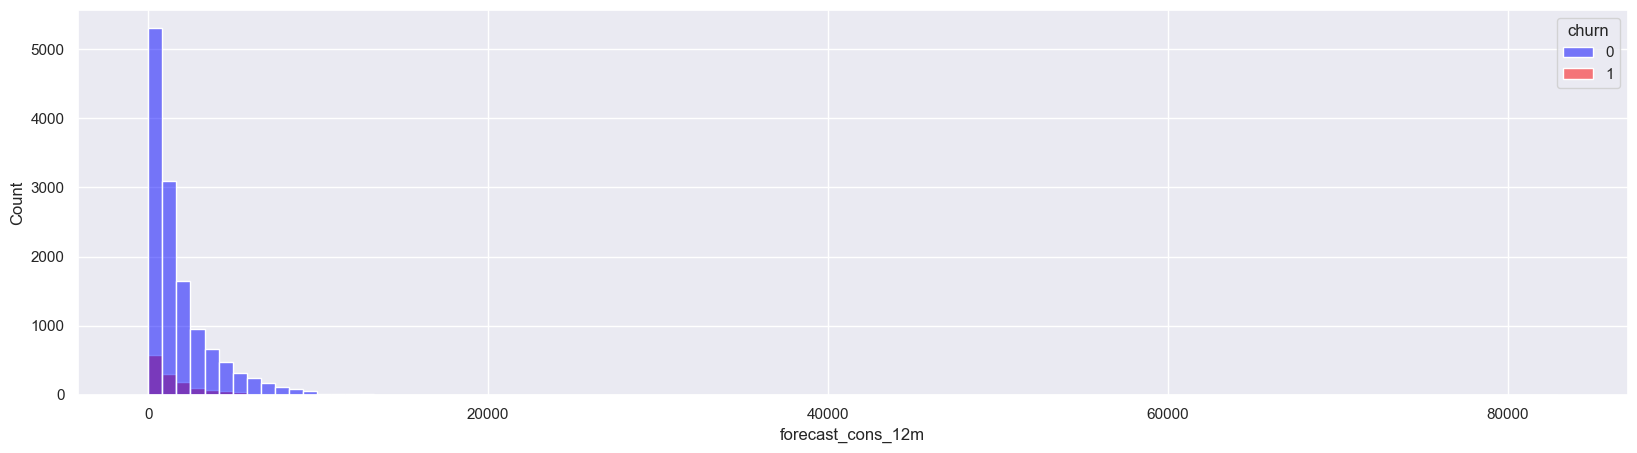

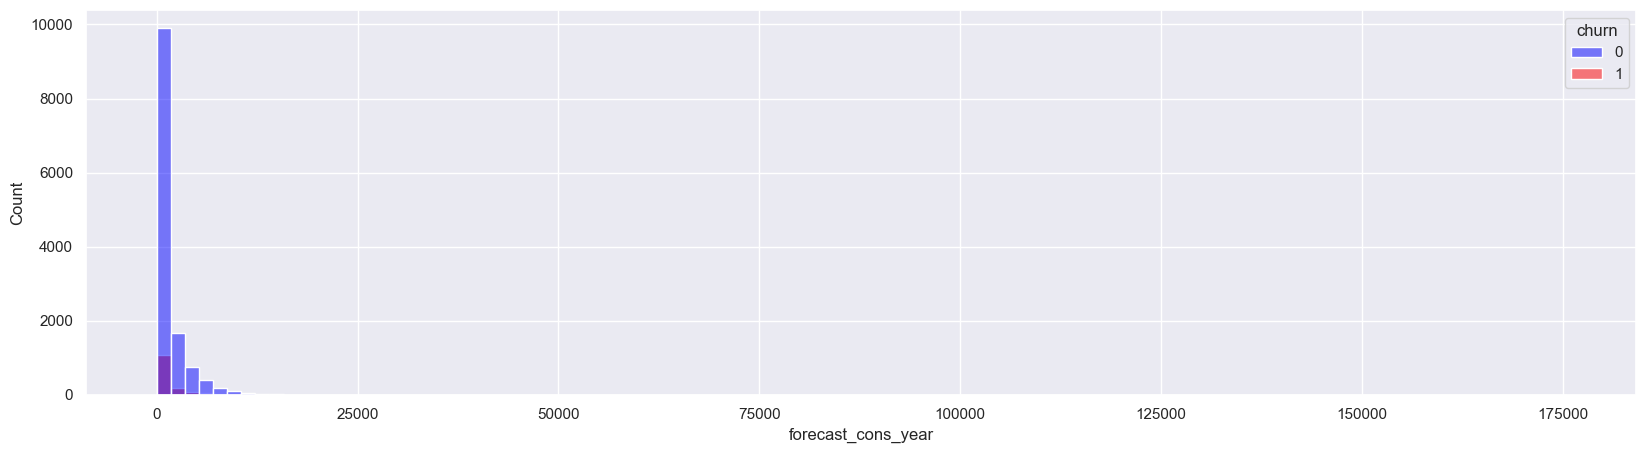

In [23]:
for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

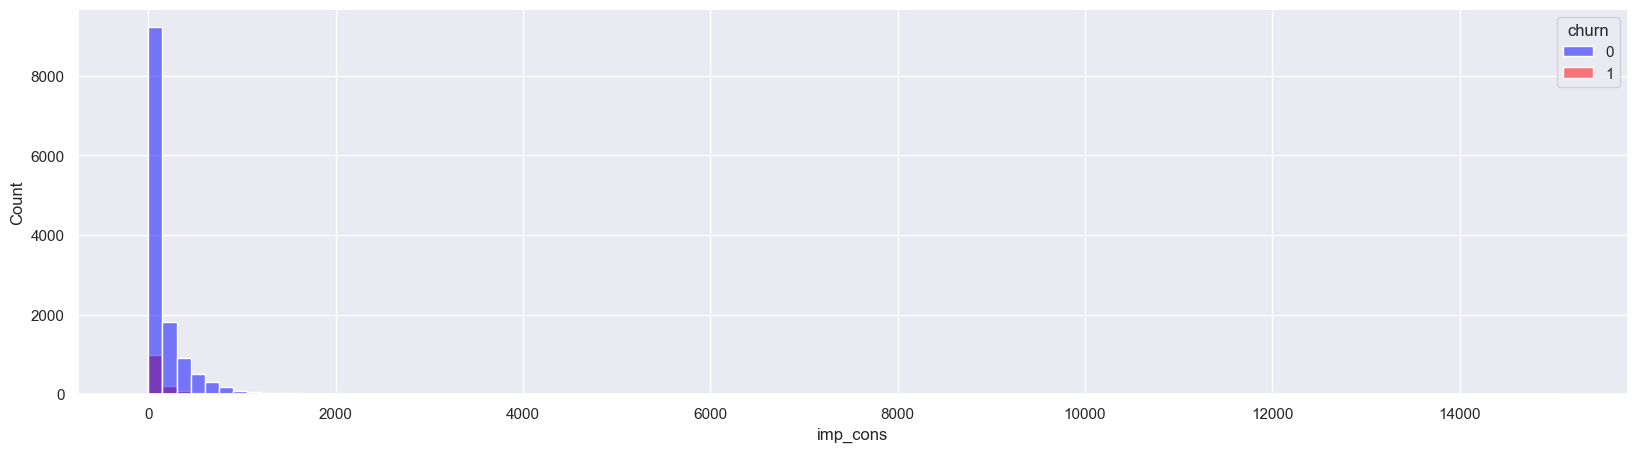

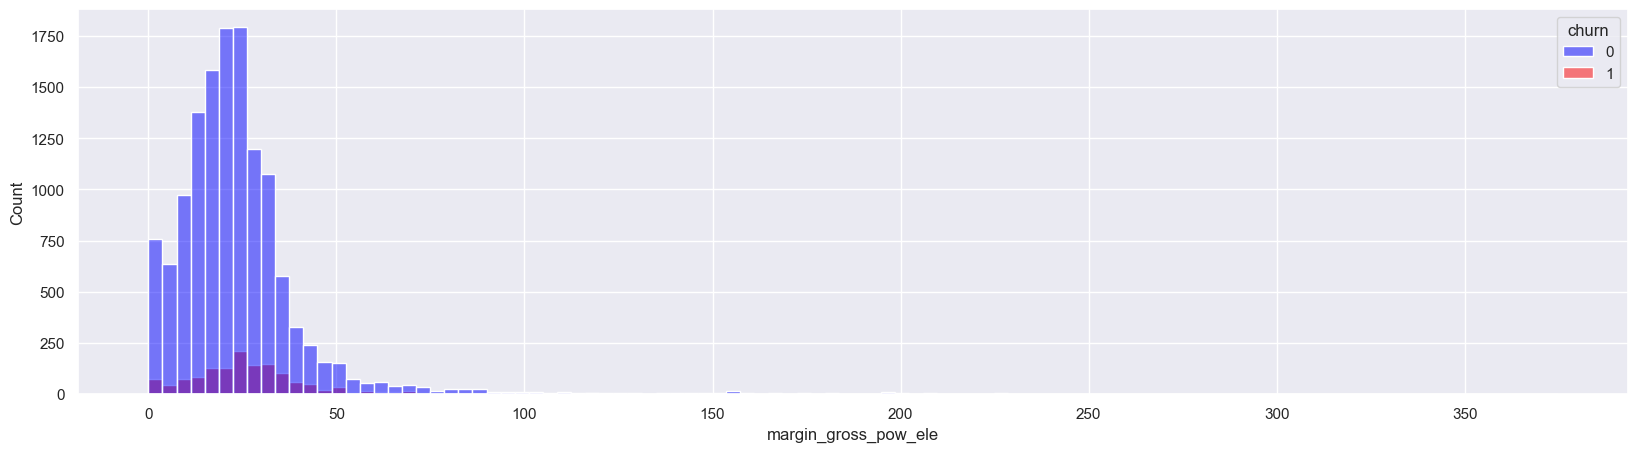

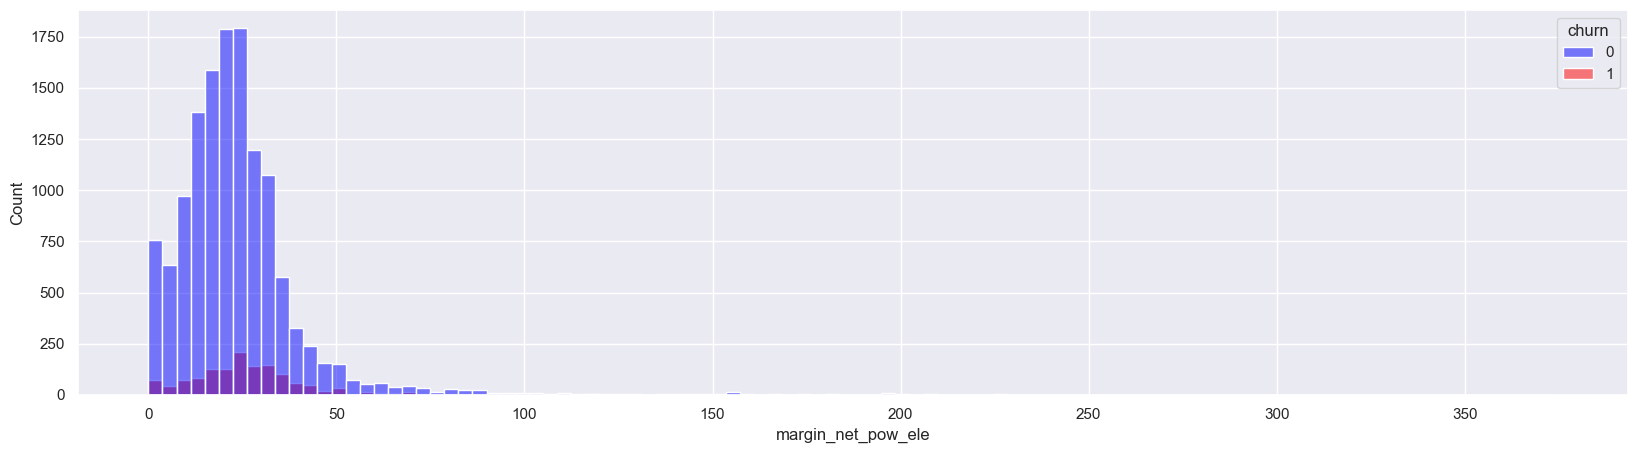

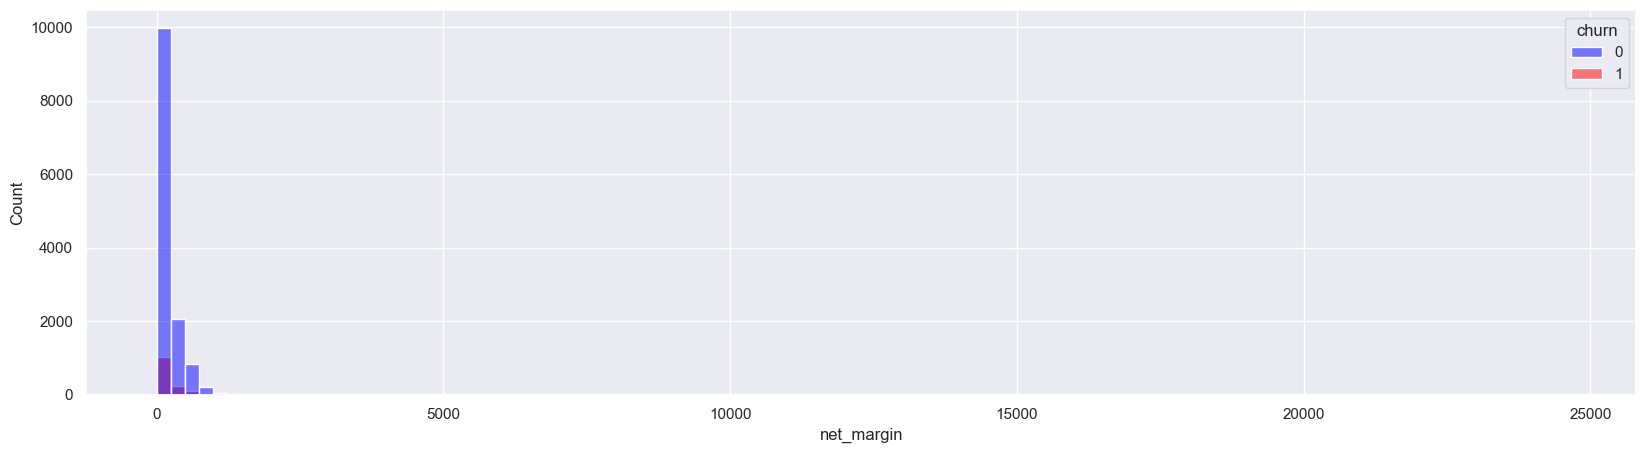

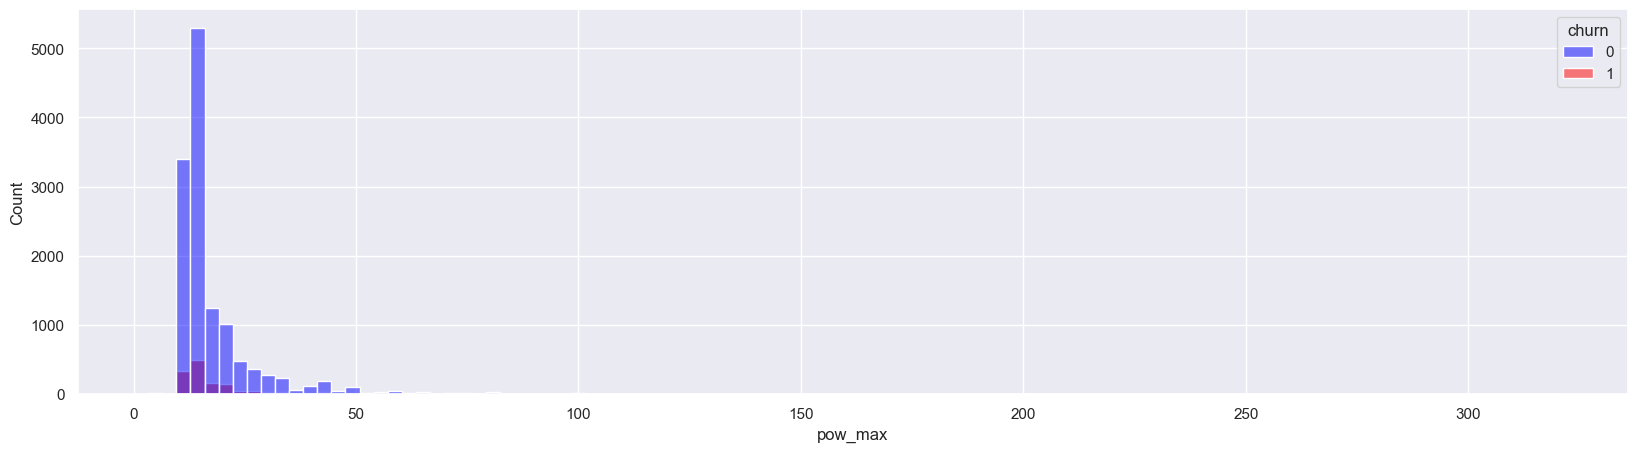

In [24]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

Most of the numberic features are somewhat skewed.

In [25]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


Merging client_df and price_df

In [26]:
# add churn values
price_stat = price_stat.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [27]:
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']

price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


In [38]:
# add diff
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


There is not much change in the prices of most of the customers.

In [32]:
price_stat_6_month = price_df[price_df['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()
# add churn values
price_stat_6_month = price_stat_6_month.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_6_month = price_stat_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']

In [46]:
def bar_chart(df, target_variable, if_sort=False, gap_label_bar=0.01, figsize=(9, 6)):
    # Prepare data
    plot_data = df[target_variable].value_counts().reset_index()
    plot_data.columns = [target_variable, 'count']
    plot_data['percent'] = (plot_data['count'] / plot_data['count'].sum()) * 100

    # Sort the data
    if if_sort:
        plot_data = plot_data.sort_values(by='percent', ascending=False)
    else:
        plot_data = plot_data.sort_values(by=target_variable)

    # Set a custom color palette
    colors = sns.color_palette(['red', 'black'])

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', palette=colors)

    # Add labels and percentages
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + gap_label_bar
        ax.annotate('{:.2f}%'.format(p.get_height()), (x, y), ha='center')

    ax.set_ylabel('Percentage')
    ax.set_xlabel(target_variable)
    plt.title('Percentage of {}'.format(target_variable))

    plt.show()

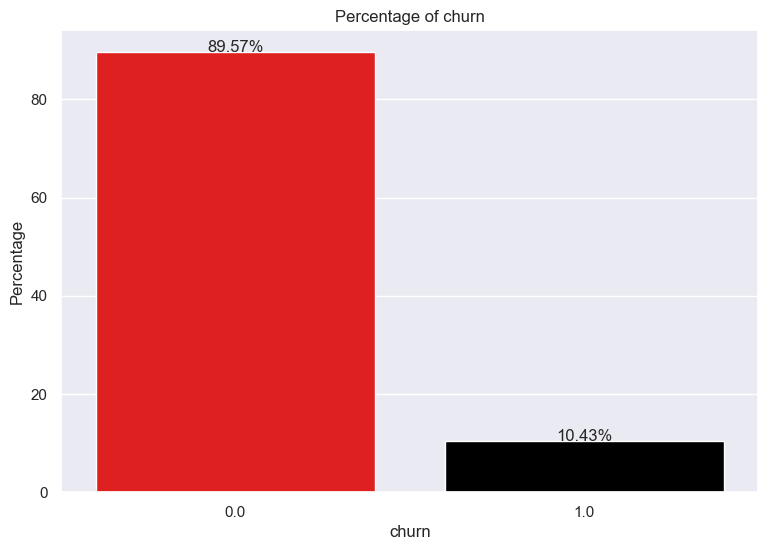

In [47]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

Out of the customers whose off-peak energy prices either decreased or remained unchanged, approximately 10.43% of them switched to a different energy provider.

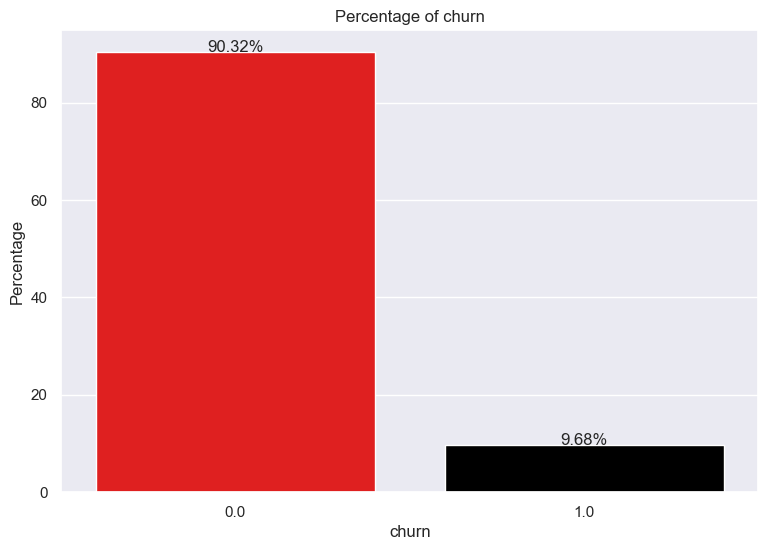

In [48]:
bar_chart(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

Out of the customers who experienced an increase in off-peak power prices, approximately 9.68% of them switched to a different service provider.

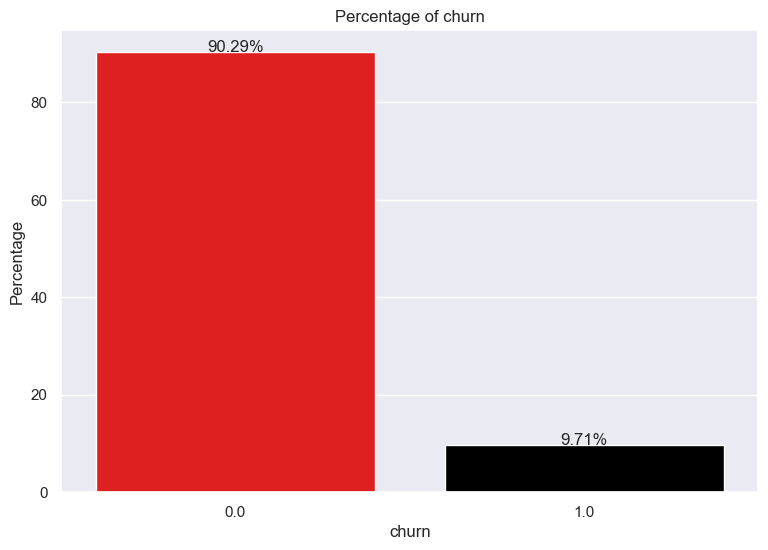

In [49]:
bar_chart(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

Out of the customers whose off-peak energy prices either decreased or remained unchanged, approximately 9.71% of them switched to a different energy provider.

Based on the displayed outcomes, it's evident that the churning customer proportion consistently remained at approximately 9.72%, regardless of price fluctuations. This implies that alterations in prices did not influence customer churn. Hence, we can deduce that customers were not responsive or sensitive to price variations.

To validate this conclusion, I proceeded to compare the prices in December with the average prices over the last 6 months and 3 months.

In [51]:
price_stat_6_month = price_df[price_df['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()
# add churn values
price_stat_6_month = price_stat_6_month.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_6_month = price_stat_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']
price_stat_6_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.000744,7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.000744,7.105427e-15
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.000744,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00


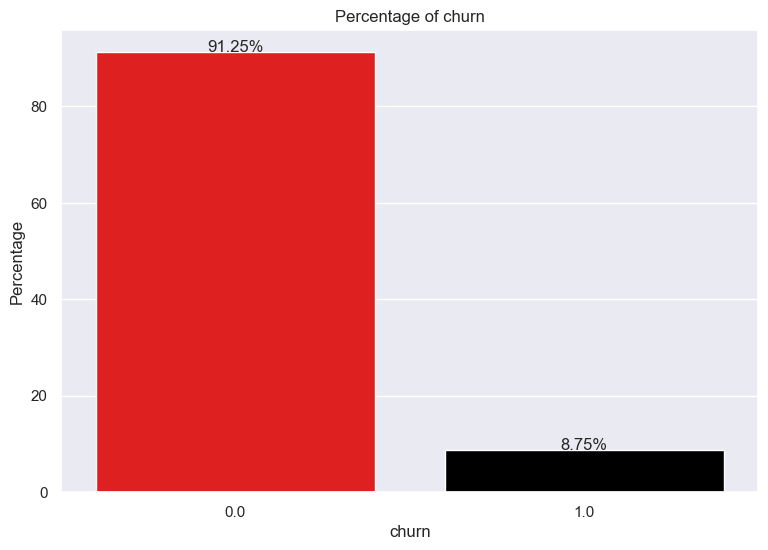

In [53]:
bar_chart(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

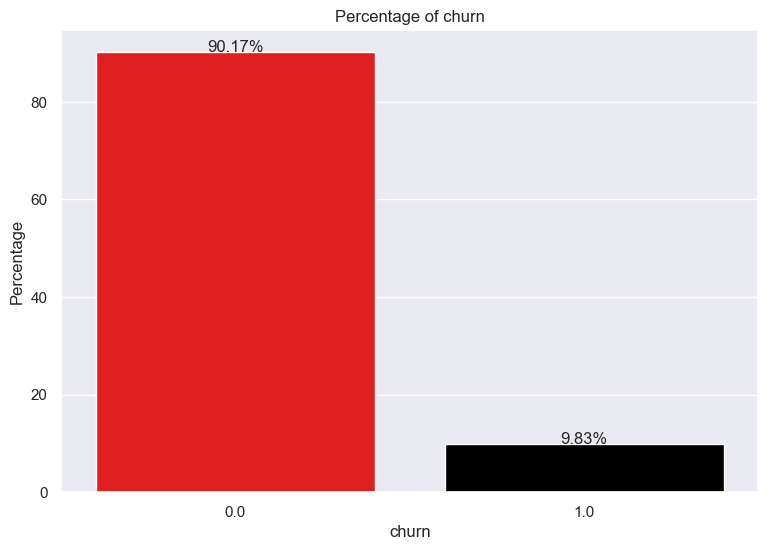

In [54]:
bar_chart(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)


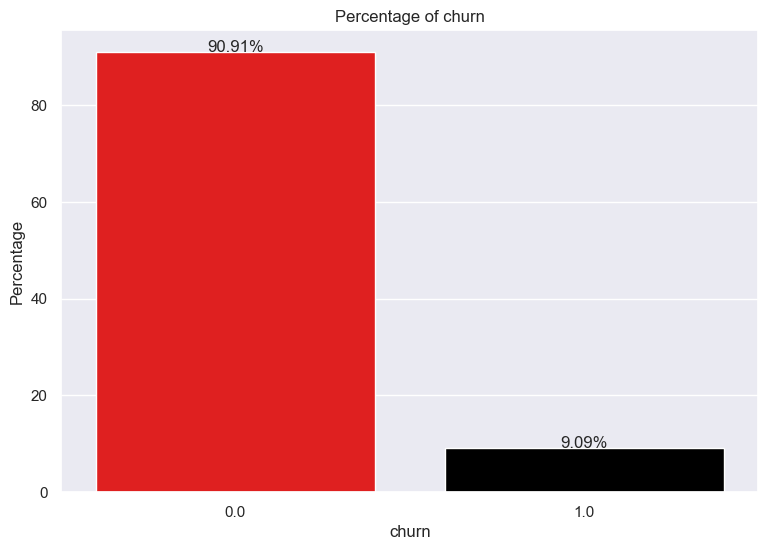

In [55]:
bar_chart(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

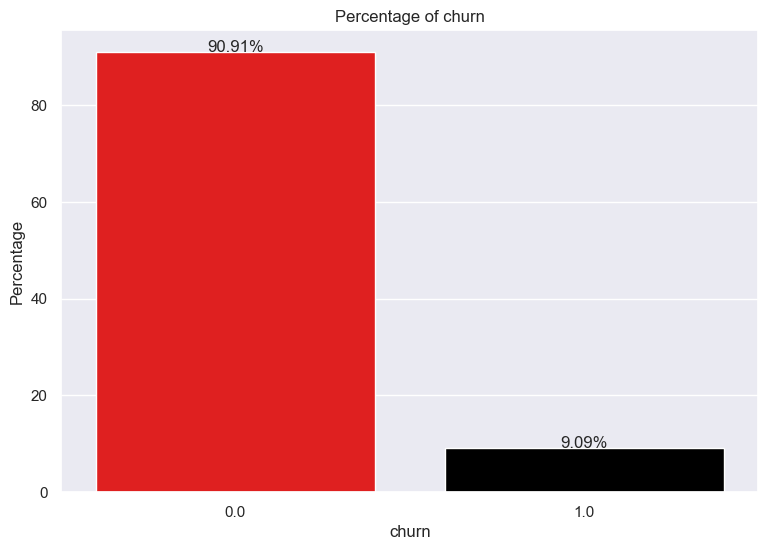

In [56]:
bar_chart(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

In [58]:
price_stat_3_month = price_df[price_df['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_3_month.columns = ['_'.join(x) for x in zip(price_stat_3_month.columns.get_level_values(0), price_stat_3_month.columns.get_level_values(1))]
price_stat_3_month = price_stat_3_month.reset_index()
# add churn values
price_stat_3_month = price_stat_3_month.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_3_month = price_stat_3_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_3_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_3_month[f'{attr}_mean']

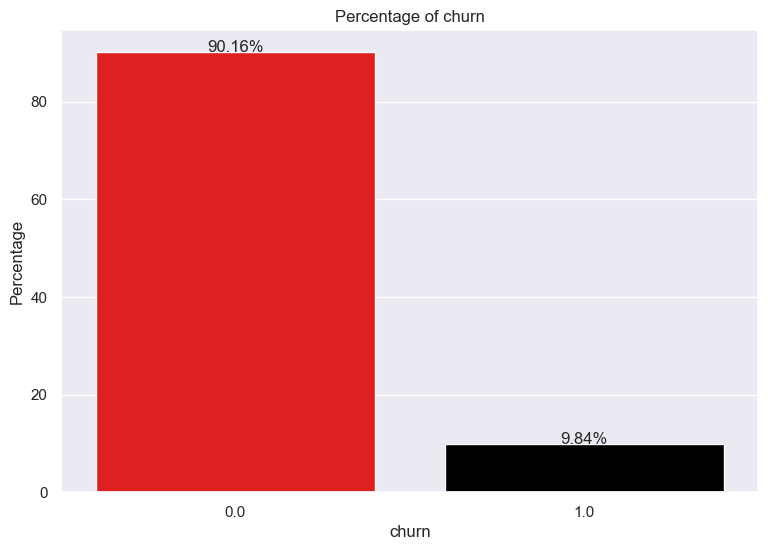

In [60]:
bar_chart(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)


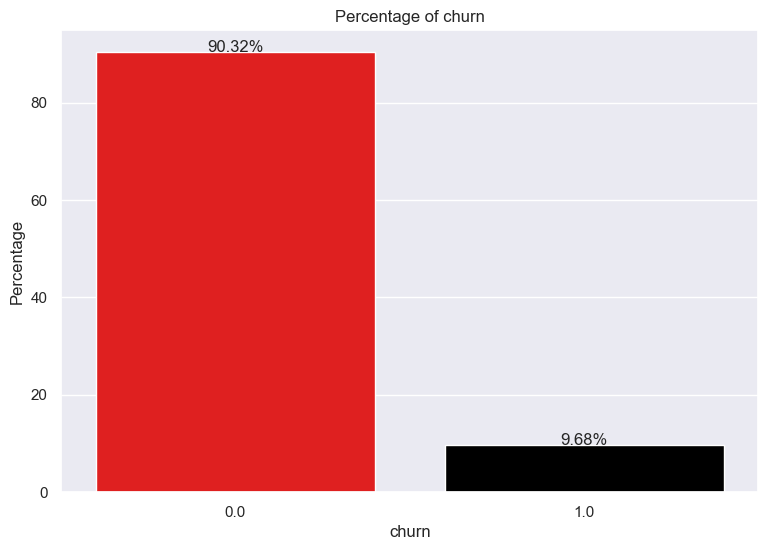

In [61]:
bar_chart(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

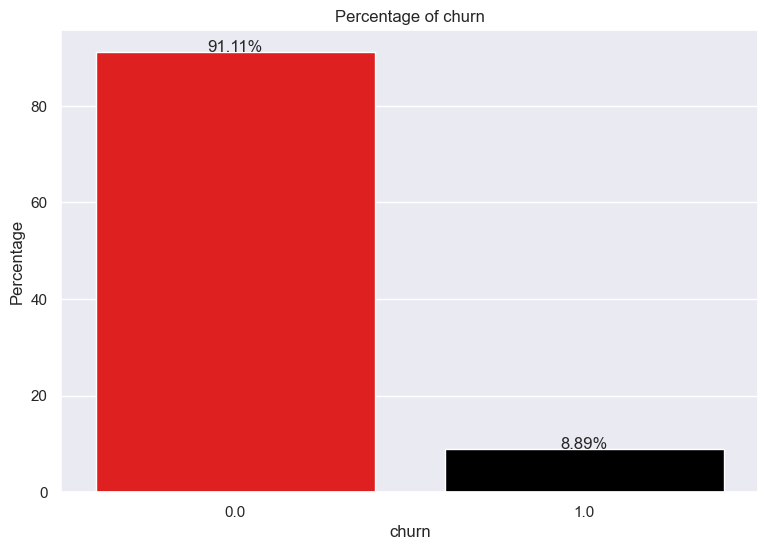

In [62]:
bar_chart(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

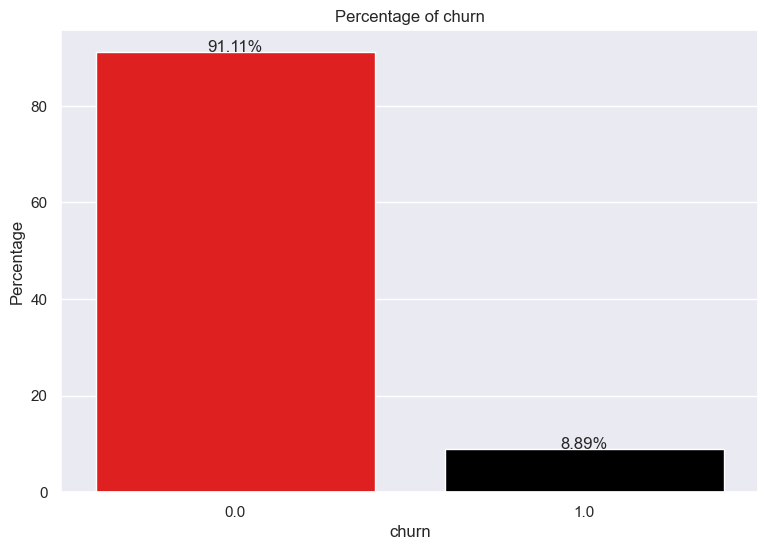

In [63]:
bar_chart(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

It is evident from the above analysis that customer churn is not affected by price.

 ## Key findings:
 
 * out of all the customers 9.7 % have switched to other service providers.
 * The highest number of customers were from sales channel 4 i.e 7570.
 * The customers who are significant consumers of gas in the last 12 months are less likely to churn compared to those who are significant consumers of electricity.
 * churn rate is notably elevated within the first two years of being associated with the company. The churn rate gradually decreases up to around nine years, after which it exhibits a slight deviation from this declining trend.
 * A huge number of customers registered in year 2009 - 2013. 2013 is the year in which maximum number of curtomer churned and after that year registration declined by approximately 66%.
 * A large pack of customers does not have gas connection. Also churn is higher among the customers who doesnot have gas.
 * The maximum number of customers have 1 to 3 products active. Although there is not much data for customers having active products more than 5 but there is a trend that customers having active product more than 5 have not churned.
 * The continuous numerical features displayed skewed distributions.
 * the churning customer proportion consistently remained at approximately 9.72%, regardless of price fluctuations. This implies that alterations in prices did not influence customer churn. Hence, we can deduce that customers were not responsive or sensitive to price variations.
 
 ## Suggestions:
 
* Based on the analysis, a notable decrease in customer registrations is observed after the year 2013, suggesting the occurrence of a significant event that triggered this decline. To gain a deeper understanding of this situation, additional data from the company pertaining to this specific period would be immensely beneficial.

* In addition to internal data, access to competitors' pricing data is crucial to comprehensively investigate the factors contributing to churn. Understanding the pricing landscape in comparison to competitors will provide valuable insights.

* Moreover, collecting feedback from customers represents a valuable source of data to enhance service quality. Customer feedback can shed light on areas of improvement, guiding strategic decisions aimed at enhancing overall customer satisfaction and retention.